In [4]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os,re
import psycopg2 as pg2

In [35]:
def config():
    global database, user, password
    database = 'Sample Database'
    user = 'postgres'
    password = 'W402ibdt$$'
    
config()
conn = pg2.connect(database = database , user = user, password = password)
cur = conn.cursor()
First_Name = 'Ben'
Age = 33
Color = 'Yellow'
cur.execute('INSERT INTO Sample_Table(column3,column2, column4) VALUES (%s,%s,%s)', (First_Name, Age, Color))
conn.commit()
conn.close()

In [38]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT * FROM Sample_Table')
data = cur.fetchall()
conn.close()

print(data)

[(1, 50, 'John', None), (2, 50, 'Jack', 'Red'), (3, 33, 'Ben', 'Yellow')]


[(1,), (2,), (3,)] [(50,), (50,), (33,)]


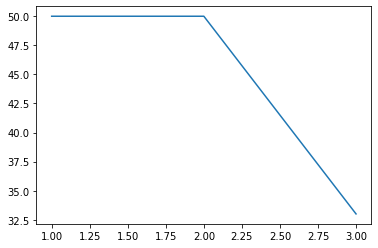

In [43]:
conn = pg2.connect(database=database, user=user, password=password)
cur = conn.cursor()
cur.execute('SELECT column1 FROM Sample_Table')
data1 = cur.fetchall()
cur.execute('SELECT column2 FROM Sample_Table')
data2 = cur.fetchall()
conn.close()

print(data1, data2)
plt.plot(data1, data2)
plt.show()
